In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

%matplotlib inline  

In [3]:
pi_true = np.array([0.35, 0.45, 0.2])
mu_true = np.array([-2,1,5])
sigma_true = np.array([0.9, 0.3, .7])
col = ['b', 'r', 'g']

N = 10000
v = np.zeros((np.size(pi_true), N))
C = np.zeros(np.size(pi_true)).astype(int)
obs = np.zeros(N)
sampling = np.zeros(N)
sampling2 = np.zeros(N)

for i in range(N):
    z = np.random.random_sample()
    idx = 0
    tempSum = 0
    
    for j in range(np.size(pi_true)):
        if ((z > tempSum) & (z<=tempSum+pi_true[j])):
            idx = j
            break
        else:
            tempSum = tempSum + pi_true[j]
    
    v_temp = np.random.normal(mu_true[idx], sigma_true[idx], 1)
    C[idx] = C[idx] + 1
    v[idx, C[idx]] = v_temp
    obs[i] = v_temp
    sampling2[i] = np.random.normal(mu_true[idx], sigma_true[idx])

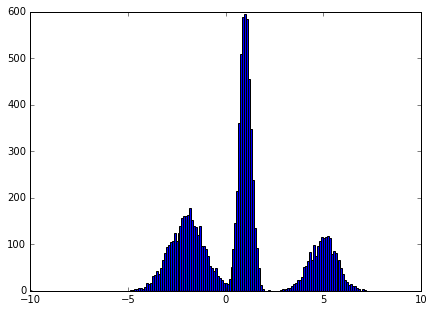

In [4]:
plt.figure(1, figsize=(7,5))
plt.hist(obs, bins=np.linspace(-10,10,(10-(-10))/0.1))
plt.show()

In [6]:
cnt = 0
discarded = 0
obs = np.zeros(N)
M = 100
mu_assumed = np.array([0,0,0])
sigma_assumed = np.array([1,1,1])

while cnt < N-1:
    idx = np.random.random_integers(3)-1
    sample = np.random.normal(mu_assumed[idx], sigma_assumed[idx])
    q = 1/3. * multivariate_normal.pdf(sample, mu_assumed[idx], sigma_assumed[idx])
    p = pi_true[idx] * multivariate_normal.pdf(sample, mu_true[idx], sigma_true[idx])
    u = np.random.random_sample()
    
    if u*M*q < p:
        cnt = cnt + 1
        obs[cnt] = sample
    else:
        discarded = discarded + 1

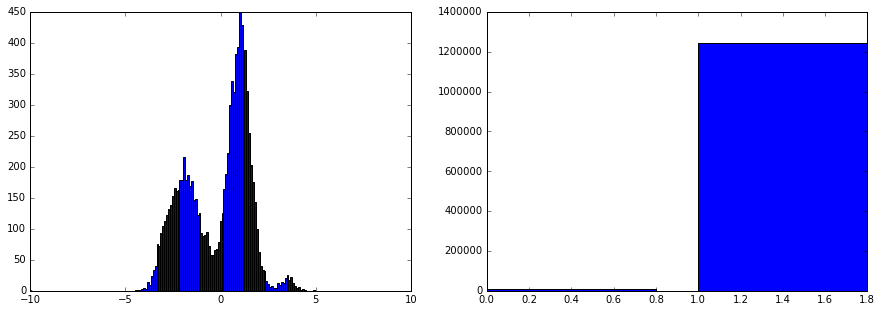

In [9]:
plt.figure(1, figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(obs, bins=np.linspace(-10,10,(10-(-10))/0.1))

plt.subplot(1,2,2)
plt.bar(range(len([cnt, discarded])), np.array([cnt, discarded]))
plt.show()